<a href="https://colab.research.google.com/github/joaumsud/Basf-Python-Analysis/blob/master/Basf_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 - Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## **2 - Show DataTable**

In [ ]:
job_salary = pd.read_csv('/content/drive/MyDrive/Basf.IA.2022/ds_salaries.csv')
job_salary.drop(job_salary[['Unnamed: 0', 'salary','salary_currency']], axis=1, inplace=True)
job_salary

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


## **3 - Show Experience Level**

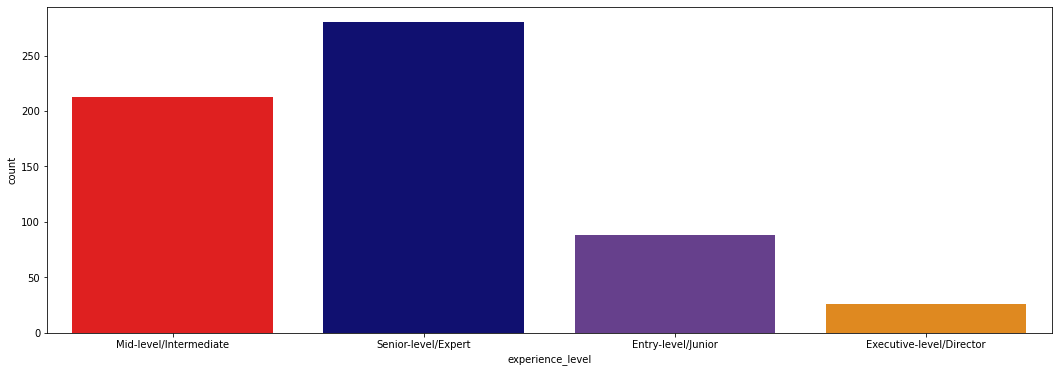

In [ ]:
job_salary['experience_level'] = job_salary['experience_level'].replace('EN','Entry-level/Junior')
job_salary['experience_level'] = job_salary['experience_level'].replace('MI','Mid-level/Intermediate')
job_salary['experience_level'] = job_salary['experience_level'].replace('SE','Senior-level/Expert')
job_salary['experience_level'] = job_salary['experience_level'].replace('EX','Executive-level/Director')
plt.rcParams['figure.figsize'] = (18,6)
sns.countplot(x='experience_level', data=job_salary, palette=['red', 'navy', 'rebeccapurple', 'darkorange'])

## **4 -Top 10 Job Titles**

In [ ]:
job_salary.drop_duplicates('job_title')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,NZ,50,NZ,S
13,2020,MI,FT,Lead Data Analyst,87000,US,100,US,L


In [ ]:
job_salary.drop_duplicates('job_title').count().drop(['work_year','experience_level','employment_type' , 'salary_in_usd', 'employee_residence','remote_ratio',      'company_location',  'company_size'])

job_title    50
dtype: int64

In [ ]:
top_ten_job = job_salary['job_title'].value_counts()[:10]
graph = px.bar(y=top_ten_job.values, 
             x=top_ten_job.index,
             width=1200, height=900, 
             color = top_ten_job.index,
             color_discrete_sequence=px.colors.qualitative.Prism,
             text=top_ten_job.values,
             title= 'Top 10 Job Titles',
             template= 'seaborn')
graph.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="Count",
    font = dict(size=17,family="Arial"))
graph.show()

# **Salary Analysis**



## **5  - Twenty Highest Salary by job**

In [ ]:
salary_per_job = job_salary.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_per_job = salary_per_job[-20:]
graph = px.bar(x=salary_per_job['job_title'],
               width=1200, height=600, 
               y=salary_per_job['salary_in_usd'],text = salary_per_job['salary_in_usd'],
                   color =  salary_per_job['salary_in_usd'],color_discrete_sequence=px.colors.qualitative.Prism)

graph.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Mean Salary ")
graph.update_layout(barmode = 'relative',xaxis_tickangle=45, 
                  title='Top 20 Highest Salary by Job Title', template='seaborn',font = dict(size=17,family="Arial"))

## **6 - Mean Salary by Experience Level**

In [ ]:
expLevel_salary = job_salary[['experience_level','salary_in_usd']]

entry_salary = expLevel_salary.loc[expLevel_salary['experience_level']=='Entry-level/Junior']
executive_salary = expLevel_salary.loc[expLevel_salary['experience_level']=='Executive-level/Director']
mid_salary = expLevel_salary.loc[expLevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = expLevel_salary.loc[expLevel_salary['experience_level']=='Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'],mid_salary['salary_in_usd'],senior_salary['salary_in_usd'],executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior','Mid-level/Intermediate','Senior-level/Expert','Executive-level/Director']
colors = ['red', 'navy', 'rebeccapurple', 'darkorange']

expList = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean(),]


graph = go.Figure(data=px.bar(x= group_labels, 
                            y=expList,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Salary by Experience Level',
                            text = np.round([num/1000 for num in expList],2),
                            template = 'seaborn',
                            height=500))


graph.update_traces(width=0.4)
graph.update_layout(
    autosize=False,
    width=1200,
    height=600,
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k) ",
    font = dict(size=17,family="Arial"))

graph.show()

## **7 - BoxPlot**

In [ ]:
salaray_list = ['salary_in_usd']
graph = px.box(y=job_salary['salary_in_usd'],
               width=1200, height=600, 
               template= 'seaborn', title = 'Salary in USD')
graph.update_layout(font = dict(size=17,family="Arial"))
graph.show()

## **8 - Displot**

In [ ]:
hist_data = [job_salary['salary_in_usd']]
group_labels = ['salary_in_usd']
graph = ff.create_distplot(hist_data, group_labels, show_hist=False)
graph.layout.template = 'seaborn'
graph.update_layout(title='Salary in USD', font = dict(size=17, family="Arial"), width=1200,height=600,) 
graph.show()

## **9 - Average of salary by work year**

In [ ]:
w2020 = job_salary.loc[(job_salary['work_year'] == 2020)]
w2021 = job_salary.loc[(job_salary['work_year'] == 2021)]
w2022 = job_salary.loc[(job_salary['work_year'] == 2022)]
hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 salary','2021 salary','2022 salary']
colors = ['red', 'navy', 'rebeccapurple']

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

graph = go.Figure(data=px.bar(x= year_salary.columns, 
                            y=year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Work Year',
                            text = np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
                            template = 'seaborn',
                            height=500))

graph.update_traces(width=0.3)
graph.update_layout(
    autosize=False,
    width=1200,
    height=600,
    xaxis_title="Work Year",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Arial"))
graph.show()

# **Work Analysis**

## **10 - Remote Analysis**

In [ ]:
remote_work = ['Fully Remote','Partially Remote','No Remote Work']

plt.figure(figsize=(20,5))
graph = px.bar(x = ['Fully Remote','Partially Remote','No Remote Work'], 
       y = job_salary['remote_ratio'].value_counts().values,
       color = remote_work,
       color_discrete_sequence=px.colors.qualitative.Prism,
       text=job_salary['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution',
       template='seaborn')

graph.update_traces(width=0.4)

graph.data[0].marker.line.width = 2
graph.update_layout(
    autosize=False,
    width=1200,
    height=600,
    xaxis_title="Remote Type",
    yaxis_title="count",
    font = dict(size=17,family="Arial"))
graph.show()

<Figure size 1440x360 with 0 Axes>

In [ ]:
comp_size = job_salary[['company_size','salary_in_usd']]
small = exlevel_salary.loc[comp_size['company_size']=='S']
mid = exlevel_salary.loc[comp_size['company_size']=='M']
large = exlevel_salary.loc[comp_size['company_size']=='L']
group_labels = ['Small','Mid','Large']
colors = ['red', 'navy', 'rebeccapurple']

comp_list = [small['salary_in_usd'].mean(),
       mid['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

graph = go.Figure(data=px.bar(x= group_labels, 
                            y=comp_list,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='Mean Salary by Company Size',
                            text = np.round([num/1000 for num in comp_list],2),
                            template = 'seaborn',
                            height=500))
graph.update_traces(width=0.3)
graph.update_layout(
    autosize=False,
    width=1200,
    height=600,
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (k)",
    font = dict(size=17,family="Arial"))
graph.show()